# Ultrametric benchmark for continual learning - Data analysis & comparison between generation strategies

Here are the bash commands to get a non-parallelized run of simulations

In [1]:
# Command to launch computation on random blocks sequences
# python3 main.py -v --dataset artificial --data_tree_depth 5 --data_seq_size 200 --seqlength 200000 --seqtype random_blocks2 --split_length 1000  --nbrtest 200 --nnarchi FCL --hidden_sizes 20 -T 0.4 0.4 0.4 0.4 0.4 0.4 --blocksz 1 100 200 500 1000 2000 4000 6000 8000 10000 20000

# Command to launch computation on ultrametric sequences
# python3 main.py -v --dataset artificial --data_tree_depth 5 --data_seq_size 200 --seqlength 200000 --seqtype ultrametric --nbrtest 200 --nnarchi FCL --hidden_sizes 20 -T 0.4 0.4 0.4 0.4 0.4 0.4 --blocksz 1 100 200 500 1000 2000 4000 6000 8000 10000 20000

In this notebook we analyze the results from such simulations, loading them into ResultSet instances and using methods from data_loader.py for vizualization.<br>
Some parameters:

In [2]:
%matplotlib inline
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib.colors import hsv_to_rgb
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

import os, ast, pdb
import pickle
import numpy as np
import pandas as pd

## SIMULATION PARAMETERS ##
dataset = 'artificial_32'
nnarchi = 'FCL20'
seq_length = 300000
T = 0.4
n_tests = 300
n_batches = 10
lr=0.05
linear_ratio_for_artificial_seq = 8
artificial_seq_len = 200

## LOADING reult_loader METHODS FROM LOCAL ##
project_root = '/home/slebastard-adc/Documents/Projects/ultrametric_benchmark/Ultrametric-Benchmark'

os.chdir(project_root)
import result_loader as ld

## LOADING MAPPER FILE ##
with open('Results/simu_mapping_compact.txt', 'r', encoding='utf-8') as filenames:
    filenames_dct_txt = filenames.read().replace('\n', '')
    
sim_directory = ast.literal_eval(filenames_dct_txt)
os.chdir(project_root+'/Results')

Loading result sets from each generation method:

In [3]:
## LOADING RESULT SETS - DEPTH 7 - 128 CLASSES
dataset7 = 'artificial_128'
nnarchi7 = 'FCL50'
T7=0.6

### ULTRAMETRIC GENERATION METHOD, SHUFFLING CLASSES
rs_um_mx = ld.ResultSet(
    set_name="Ultrametric depth 7 (mixed labels)",
    sim_map_dict = sim_directory,
    dataroot = project_root,
    sim_struct = '1toM',
    dataset_name = dataset7,
    nn_config = nnarchi7,
    seq_type = 'ultrametric',
    simset_id = T7,
    hsv_orig = ld.hsv_um_mx_orig,
    hsv_shfl_list = ld.hsv_um_mx_shfl_list
)

rs_um_mx.load_analytics()

### RANDOM BLOCKS (PAIRS OF LABELS) GENERATION METHOD
rs_blck = ld.ResultSet(
    set_name="Random blocks (paired mixed labels), 32 classes",
    sim_map_dict = sim_directory,
    dataroot = project_root,
    sim_struct = '1toM',
    dataset_name = dataset7,
    nn_config = nnarchi7,
    seq_type = 'random_blocks2',
    simset_id = 328,
    hsv_orig = ld.hsv_rb_mx_orig,
    hsv_shfl_list = ld.hsv_rb_mx_shfl_list
)
rs_blck.load_analytics()

### UNIFORM PROBABILITY DISTIRUBTION
rs_unif = ld.ResultSet(
    set_name="Uniform, 32 classes",
    sim_map_dict = sim_directory,
    dataroot = project_root,
    sim_struct = '1toM',
    dataset_name = dataset7,
    nn_config = nnarchi7,
    seq_type = 'uniform',
    simset_id = 0.0,
    hsv_orig = ld.hsv_unif
)
rs_unif.load_analytics(load_shuffle=False)


Loading analytics...
load_data set to False. Data sequences not loaded.
load_atc set to False. Autocorrelations not loaded.

Loading analytics...
load_data set to False. Data sequences not loaded.
load_atc set to False. Autocorrelations not loaded.

Loading analytics...
load_data set to False. Data sequences not loaded.
load_atc set to False. Autocorrelations not loaded.


In [4]:
os.chdir(project_root+"/plots")

## Labels history

Sanity checks on the content of one of these sequences...

In [ ]:
rs_um_um.lbl_history([0.6])

In [ ]:
rs_um_um.lbl_history([0.6], shuffled_blocksz=200)

In [ ]:
rs_um_um.lbl_history([0.6], shuffled_blocksz=2000)

In [ ]:
rs_um_mx.lbl_history([0.4])

In [ ]:
rs_um_mx.lbl_history([0.4], shuffled_blocksz=200)

In [ ]:
rs_um_mx.lbl_history([0.4], shuffled_blocksz=2000)

In [ ]:
rs_blck.lbl_history([0.0])

In [ ]:
rs_blck.lbl_history([0.0], shuffled_blocksz=500)

## Accuracy = f(t) plots

The following code plots classification performance as a function of the number of epochs.
We are splitting the plots between small block sizes (for which ultrametric and random block sequences are expected to have qualitatively the same behavior), and large block sequences corresponding to temporal correlations that only exist in the ultrametric sequence:

In [5]:
sm_splt_sizes = (1, 82, 164, 328)
lg_splt_sizes = (328, 1312, 5248, 20992)
all_splt_sizes = (1, 328, 1312, 20992)

/home/slebastard-adc/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


(<Figure size 1296x2592 with 3 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f87c594c4a8>])

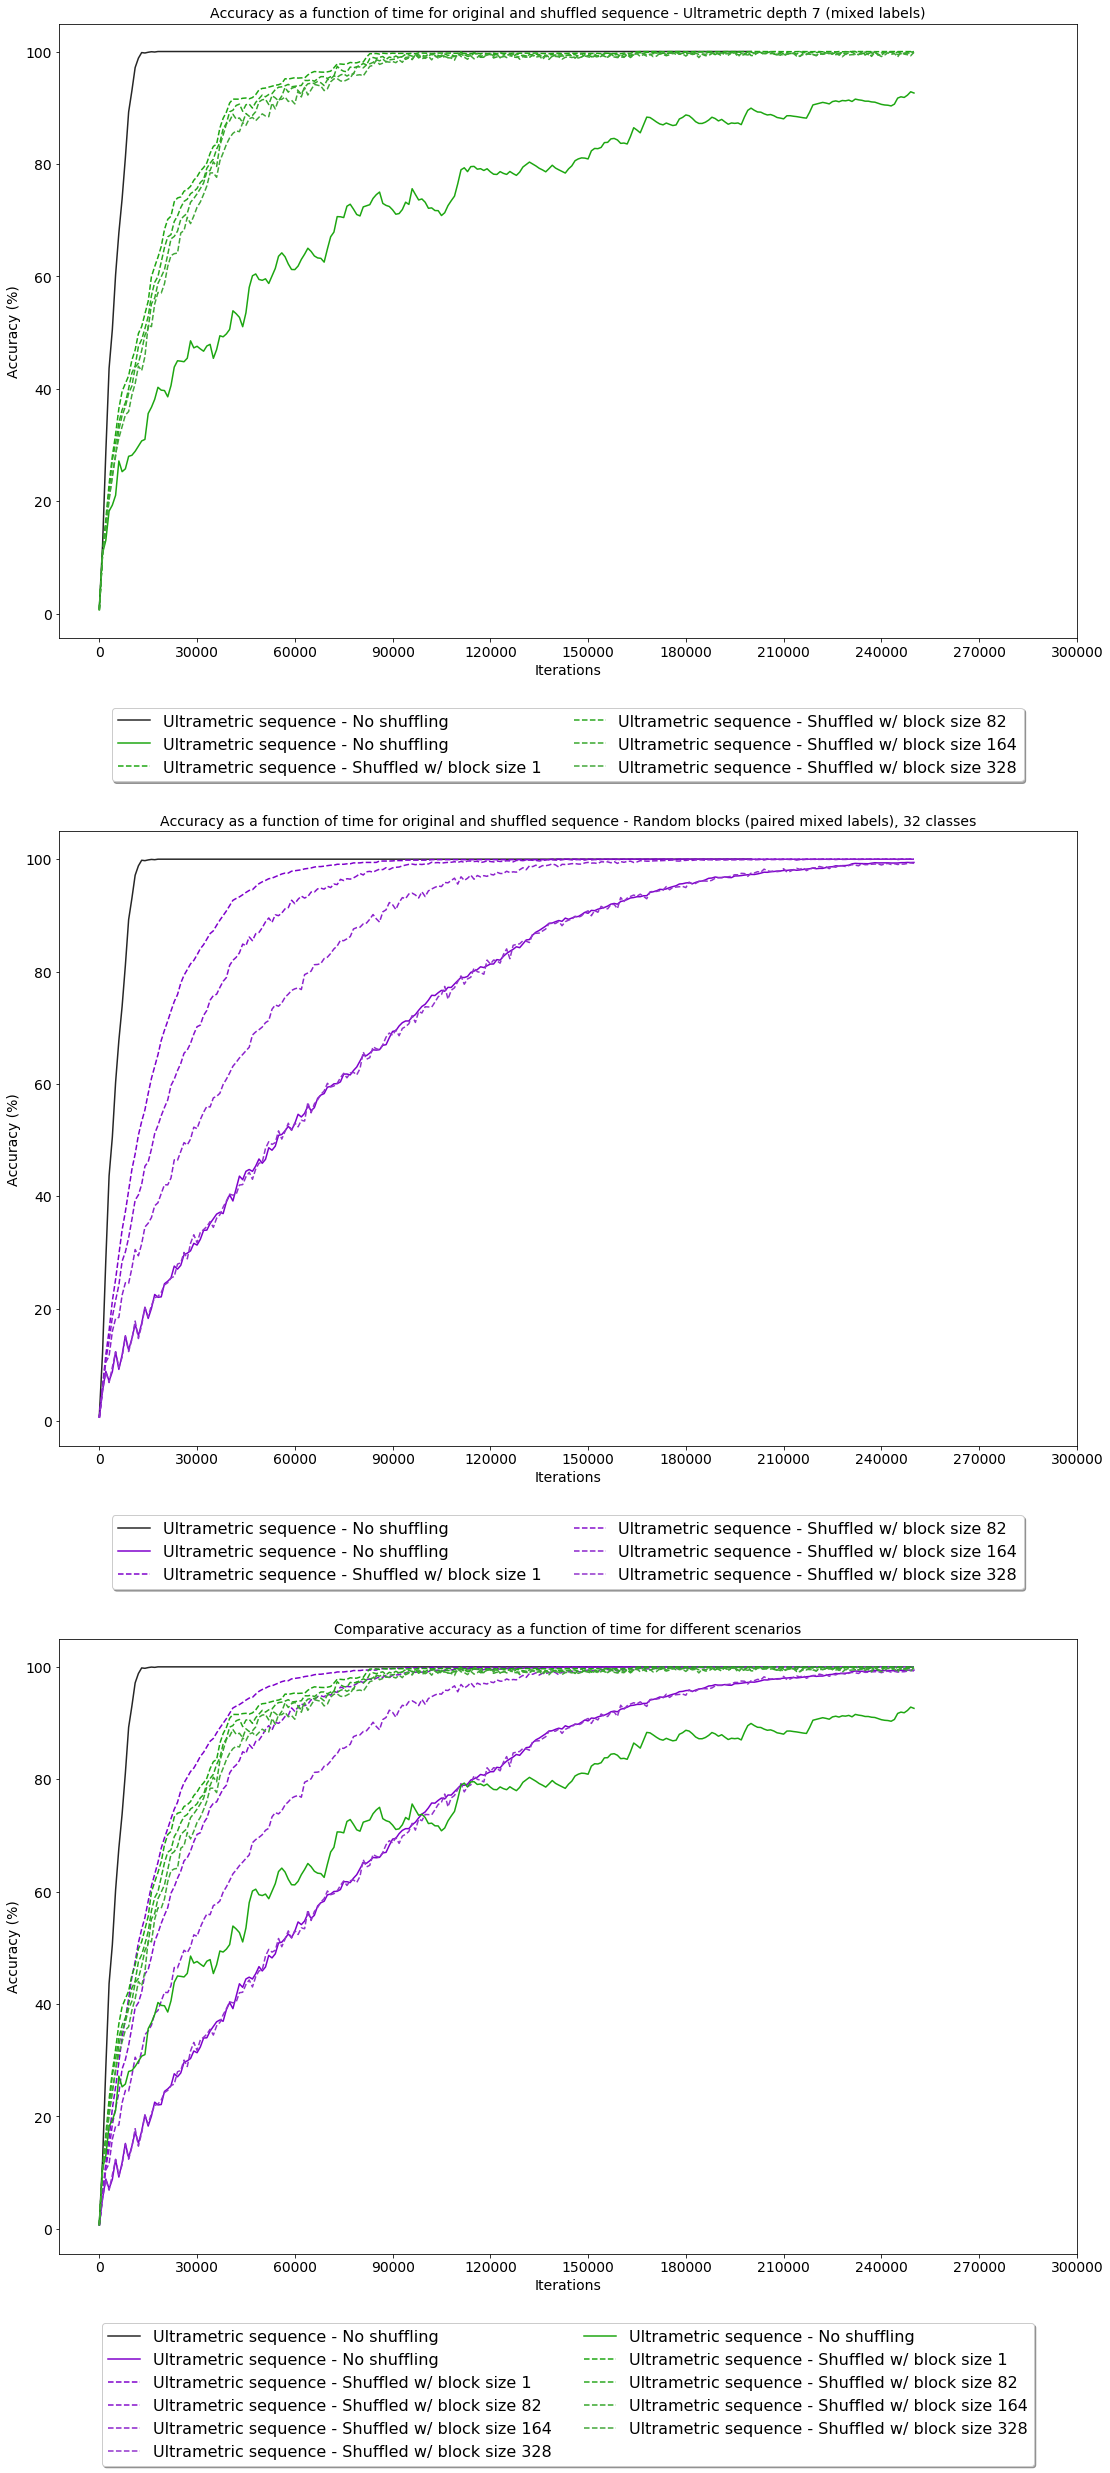

In [6]:
ld.get_acc(
	rs=rs_um_mx, rs_altr=rs_blck, rs_unif=rs_unif,
	seq_length=seq_length, n_tests=n_tests, blocks=sm_splt_sizes,
	save_format='pdf'
	)

(<Figure size 1296x2592 with 3 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f87aeef0400>])

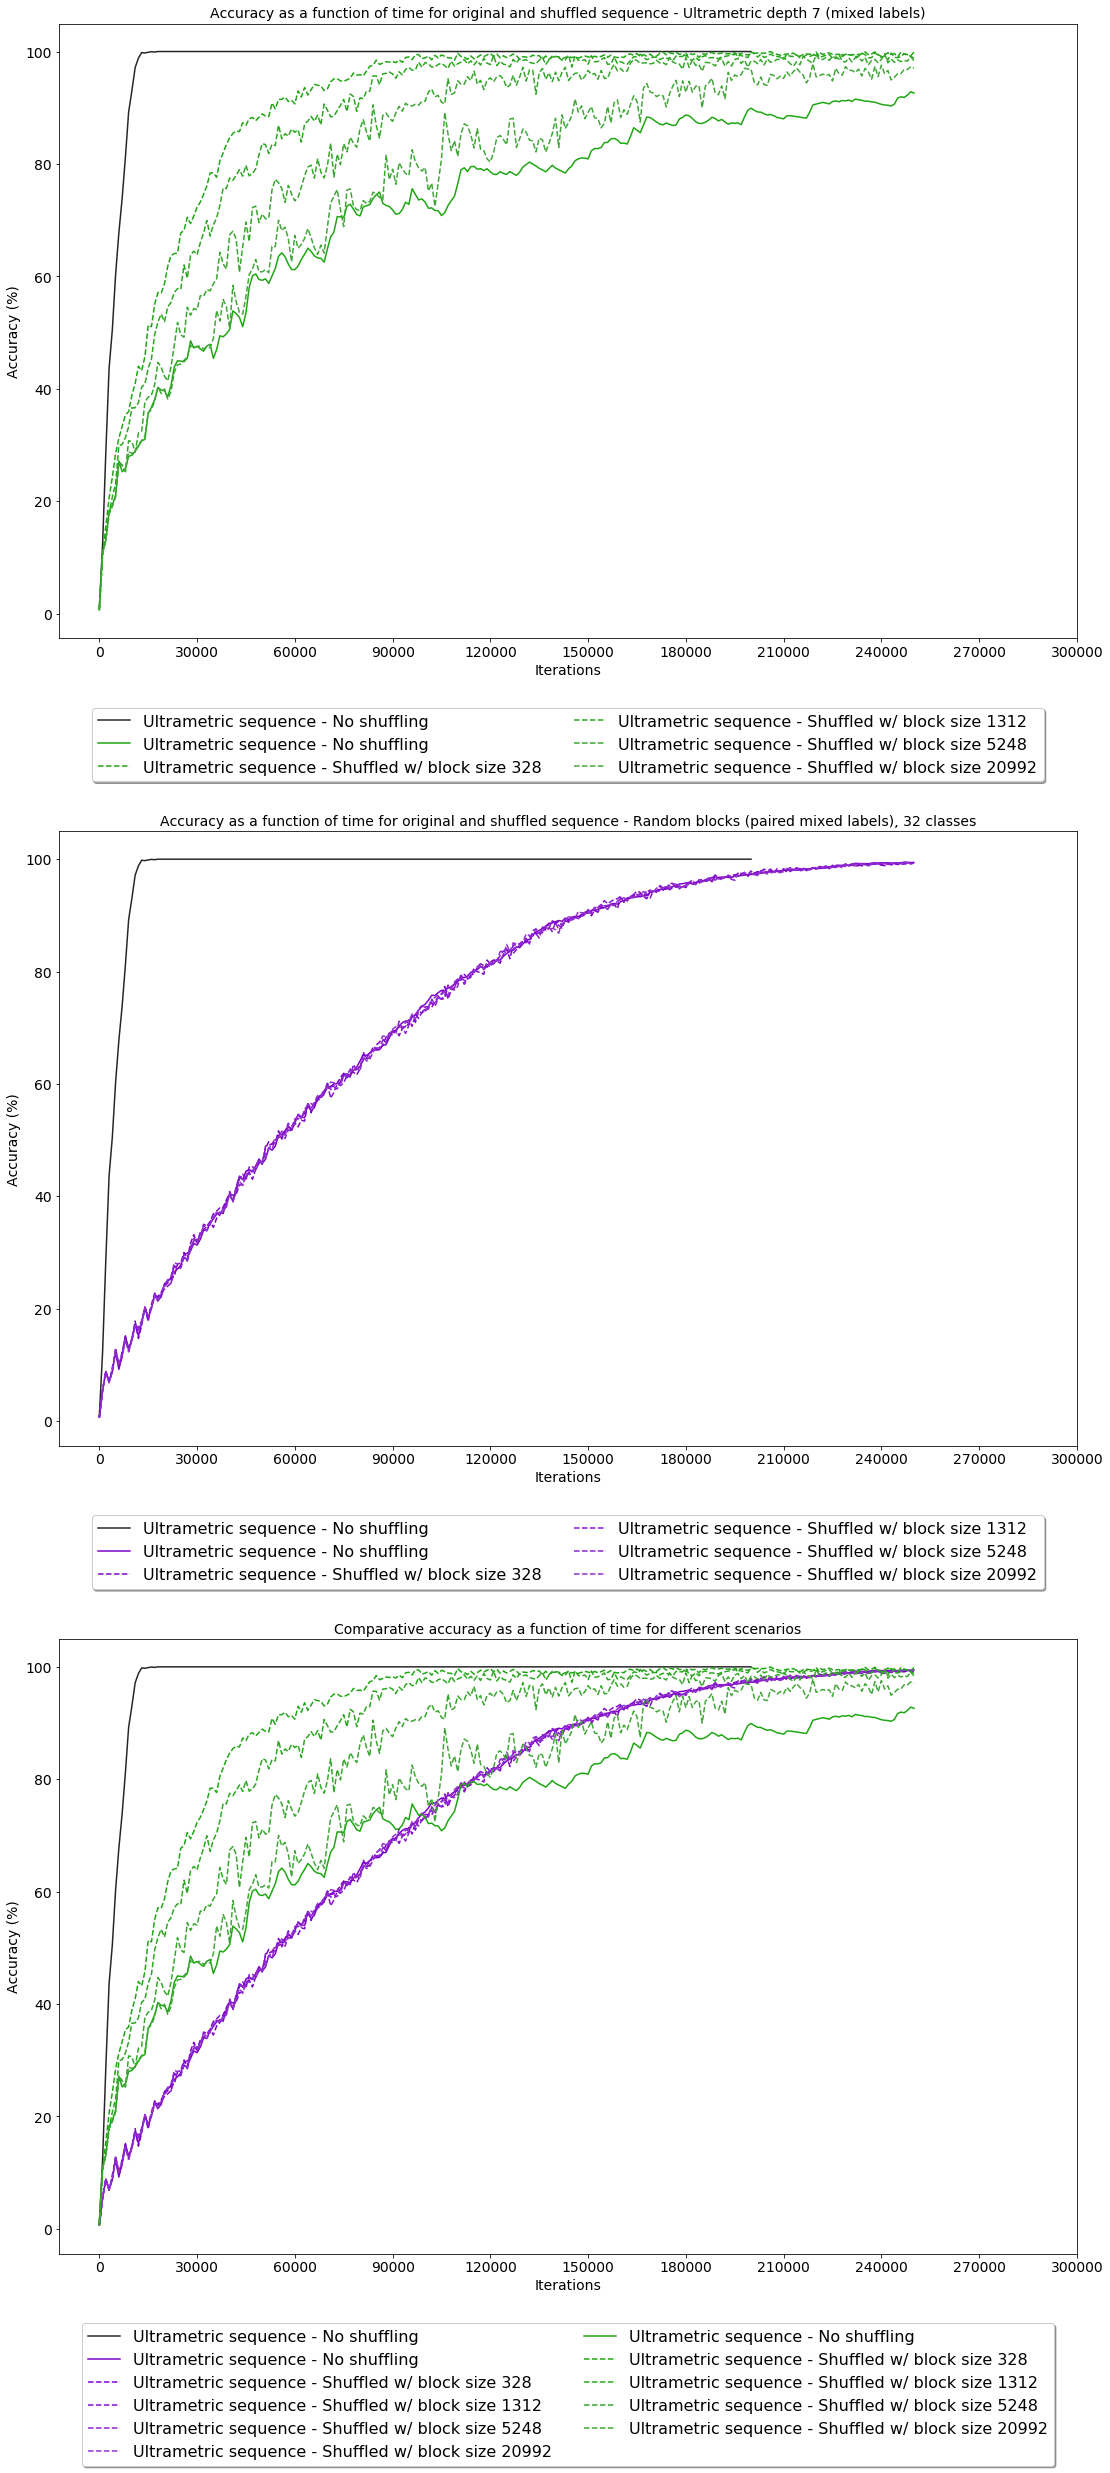

In [7]:
ld.get_acc(
	rs=rs_um_mx, rs_altr=rs_blck, rs_unif=rs_unif,
	seq_length=seq_length, n_tests=n_tests, blocks=lg_splt_sizes,
	save_format='pdf'
	)

Next we plot the catastrophic forgetting score. For a clear definition of this score, please see figure 3 among the figures that I have shared.<br>
Below is a plot of the loss in classification performance between the actual performance curve and the performance curve of the network on an analog sequence where labels where shuffled with a block size of 1, so that only exploration and the imbalance between classes can limit performance. What we measure is thus the effect of catastrophic forgetting.

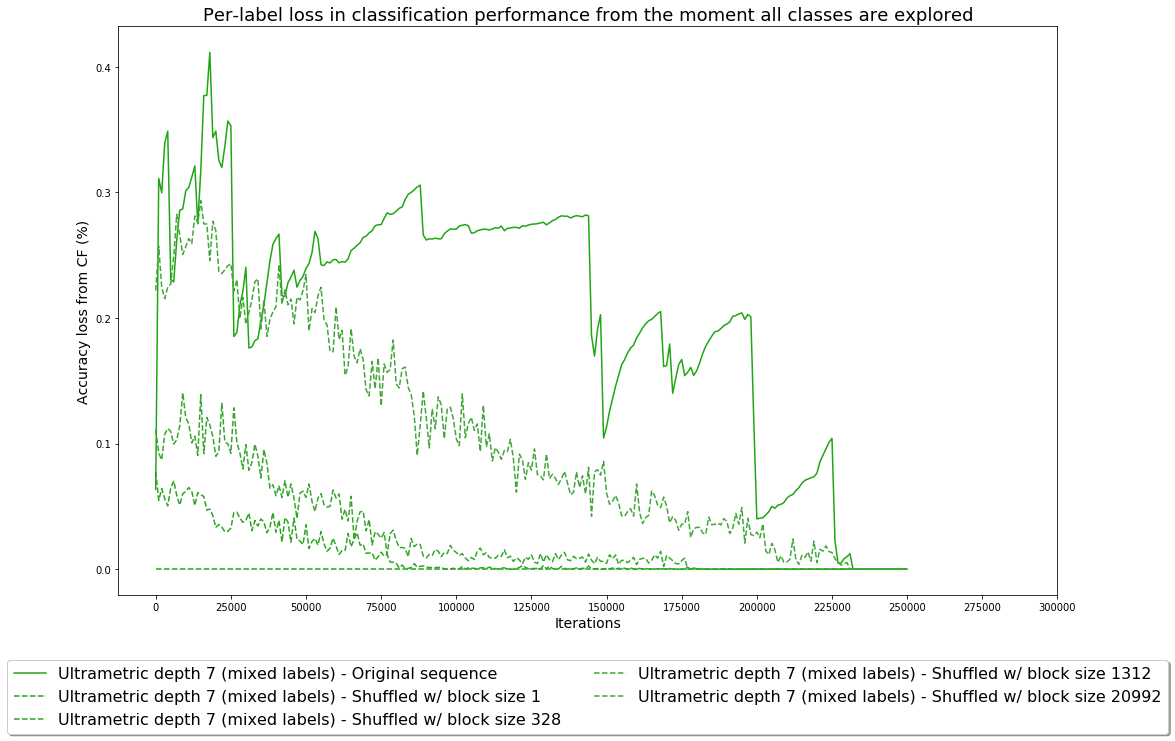

In [8]:
ummx_avg_cf, ummx_avg_cf_std, ummx_init_cf, ummx_init_cf_std = ld.load_cf_set(rs_um_mx, all_splt_sizes, save_format='svg')

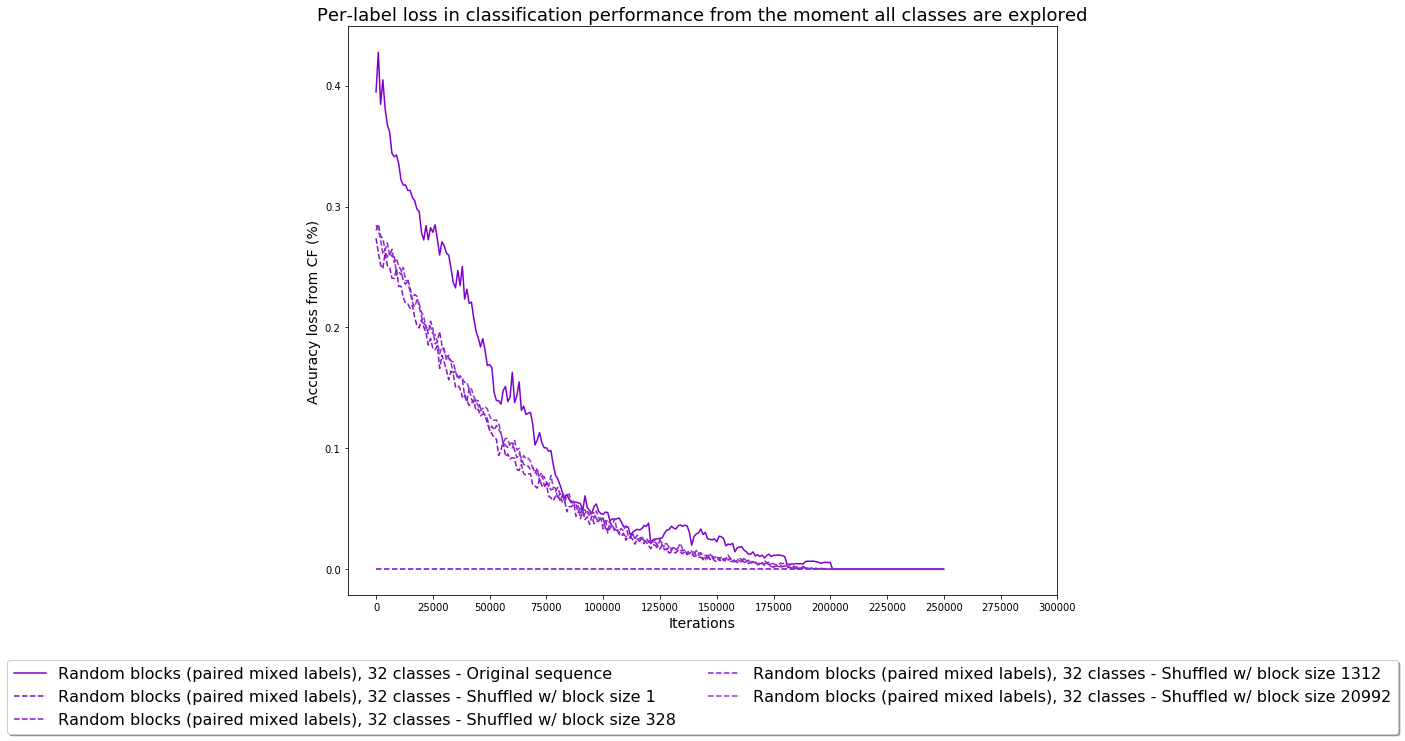

In [9]:
blck_avg_cf, blck_avg_cf_std, blck_init_cf, blck_init_cf_std = ld.load_cf_set(rs_blck, all_splt_sizes, save_format='svg')

We define the catastrophic forgetting score as the area under the previous curves.<br>
We can plot this score as a function of the shuffle size: take the original sequence, shuffle it continuously using blocks of a given size, and measure the CFS using the sequence where imbalance is the onl limit.

In [9]:
cf_sets = [
    {
        'rs': rs_um_um,
        'avg_cf': umum_avg_cf,
        'avg_cf_std': umum_avg_cf_std,
        'init_cf': umum_init_cf,
        'init_cf_std': umum_init_cf_std
    },
    {
        'rs': rs_um_mx,
        'avg_cf': ummx_avg_cf,
        'avg_cf_std': ummx_avg_cf_std,
        'init_cf': ummx_init_cf,
        'init_cf_std': ummx_init_cf_std
    },
    {
        'rs': rs_blck,
        'avg_cf': blck_avg_cf,
        'avg_cf_std': blck_avg_cf_std,
        'init_cf': blck_init_cf,
        'init_cf_std': blck_init_cf_std
    },
]

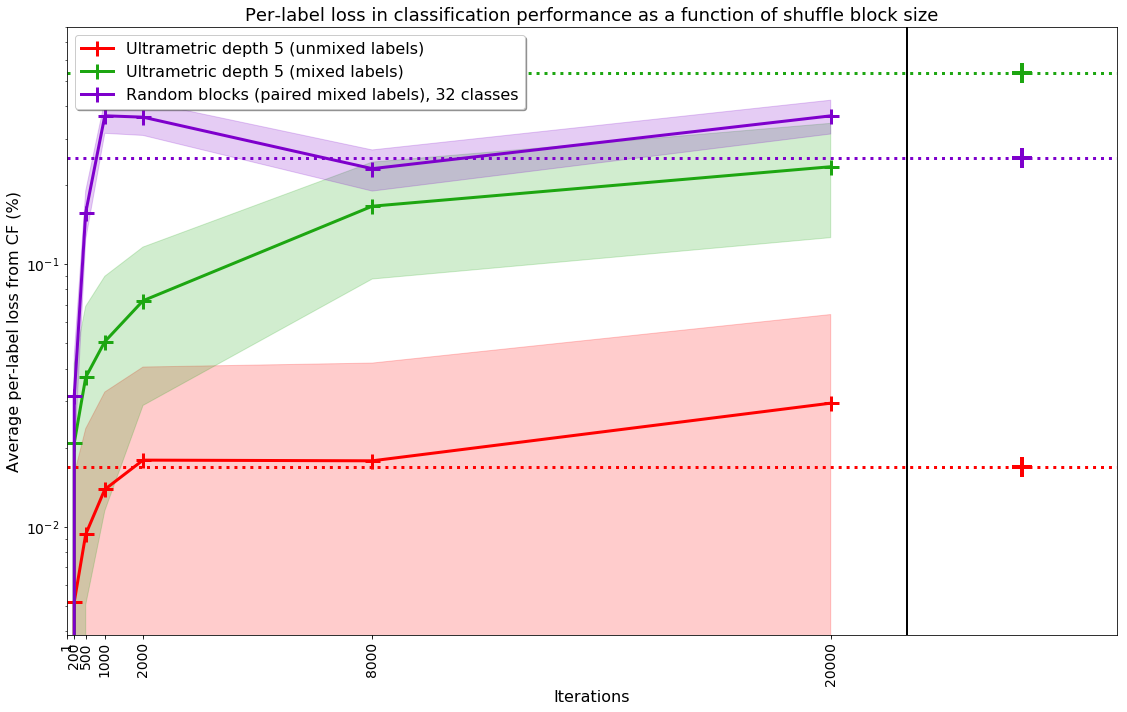

In [11]:
ld.plot_cf_profile(cf_sets, method='mean', x_origpos=2.5e4, var_scale=0.5, ylog=True)

Note: the rest of the notebook contains older material, you can disregard what follows except you have to output the distribution of labels as function of the number of epochs (I need to rewrite some of this code though)...

In [ ]:
x_origpos = 50000

fig_mean_cfs = plt.figure(figsize=(18,len(splt_sizes_rb.keys())*12))
ax_mean_cfs = plt.subplot(111)

ax_mean_cfs.plot(
    xtick_pos,
    mean_cfs_ultra,
    ls = 'solid',
    linewidth=3,
    marker = '+',
    markersize = 15,
    markeredgewidth = 3,
    color = hsv_to_rgb(hsv_orig),
    label = 'Ultrametric sequence'
)
ax_mean_cfs.set_xticks(xtick_pos, xtick_labels)
ax_mean_cfs.fill_between(
    x = xtick_pos,
    y1 = [avg_cf_ultra[k] - var_scale*avg_cf_ultra_std[k] for k in sorted(avg_cf_ultra.keys()) if k>0],
    y2 = [avg_cf_ultra[k] + var_scale*avg_cf_ultra_std[k] for k in sorted(avg_cf_ultra.keys()) if k>0],
    color = hsv_to_rgb(hsv_orig),
    alpha = 0.2
)

ax_mean_cfs.plot(
    x_origpos,
    cfmean_ultra_orig,
    marker = '+',
    markersize = 20,
    markeredgewidth = 4,
    color = hsv_to_rgb(hsv_orig)
)
ax_mean_cfs.fill_between(
    x = [x_origpos],
    y1 = [cfmean_ultra_orig - avg_cf_ultra_std[0]],
    y2 = [cfmean_ultra_orig + avg_cf_ultra_std[0]],
    color = hsv_to_rgb(hsv_orig),
    alpha = 0.2
)

ax_mean_cfs.plot(
    xtick_pos,
    mean_cfs_rb,
    ls = '--',
    linewidth=3,
    marker = 'x',
    markersize = 15,
    markeredgewidth = 3,
    color = hsv_to_rgb(hsv_tfs_orig),
    label = 'Random split sequence'
)
ax_mean_cfs.fill_between(
    x = xtick_pos,
    y1 = [avg_cf_randsplit[k] - var_scale*avg_cf_randsplit_std[k] for k in sorted(avg_cf_randsplit.keys()) if k>0],
    y2 = [avg_cf_randsplit[k] + var_scale*avg_cf_randsplit_std[k] for k in sorted(avg_cf_randsplit.keys()) if k>0],
    color = hsv_to_rgb(hsv_tfs_orig),
    alpha = 0.2
)

ax_mean_cfs.plot(
    x_origpos,
    cfmean_rb_orig,
    marker = 'x',
    markersize = 20,
    markeredgewidth = 4,
    color = hsv_to_rgb(hsv_tfs_orig)
)
ax_mean_cfs.fill_between(
    x = [x_origpos],
    y1 = [cfmean_rb_orig - avg_cf_randsplit_std[0]],
    y2 = [cfmean_rb_orig + avg_cf_randsplit_std[0]],
    color = hsv_to_rgb(hsv_tfs_orig),
    alpha = 0.2
)

# Plot formatting for figure 4 of paper

#xtick_pos = [k for k in xtick_pos] + [x_origpos]
#xtick_labels = [str(k) for k in xtick_pos] + [25000]
ax_mean_cfs.set_xticks(xtick_pos)
ax_mean_cfs.set_xticklabels(xtick_labels)

plt.title('Per-label loss in classification performance as a function of shuffle block size', fontsize = 18)

ax_mean_cfs.legend(fancybox=True, shadow=True, prop={'size': 16})

plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Average per-label loss from CF (%)', fontsize=16)

fig_mean_cfs.tight_layout(pad=10.0)

ax_mean_cfs.hlines(y=cfmean_ultra_orig, xmin=0, xmax=1.1*x_origpos, linestyles=':', linewidth=3, color = hsv_to_rgb(hsv_orig))
ax_mean_cfs.hlines(y=cfmean_rb_orig, xmin=0, xmax=1.1*x_origpos, linestyles=':', linewidth=3, color = hsv_to_rgb(hsv_tfs_orig))
ax_mean_cfs.vlines(x=30000, ymin=-0.1, ymax=1)

ax_mean_cfs.set_xscale("log")

for tick in ax_mean_cfs.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    tick.label.set_rotation('vertical')
    
for tick in ax_mean_cfs.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

ax_mean_cfs.set_xlim(0, 1.1*x_origpos)
ax_mean_cfs.set_ylim(-0.1, 0.8)

# Saving figure

plt.savefig('out_plots_cfscore_avg_logscale.svg', format='svg')
plt.savefig('out_plots_cfscore_avg_logscale.pdf', format='pdf')

In [ ]:
[k for k in sorted(avg_cf_ultra.keys()) if k>0]

In [ ]:
fig = plt.figure(figsize=(18,len(splt_sizes_rb.keys())*12))
cf_blsz_ax = plt.subplot(111)

plt.plot(
    [k for k in sorted(init_cf_ultra.keys()) if k>0],
    [init_cf_ultra[k] for k in sorted(init_cf_ultra.keys()) if k!=1],
    ls = 'solid',
    linewidth=3,
    marker = '+',
    markersize = 15,
    markeredgewidth = 3,
    color = hsv_to_rgb(hsv_orig),
    label = 'Ultrametric sequence'
)
cf_blsz_ax.fill_between(
    x = [k for k in sorted(avg_cf_ultra.keys()) if k>0],
    y1 = [init_cf_ultra[k] - var_scale*init_cf_ultra_std[k] for k in sorted(init_cf_ultra.keys()) if k>0],
    y2 = [init_cf_ultra[k] + var_scale*init_cf_ultra_std[k] for k in sorted(init_cf_ultra.keys()) if k>0],
    color = hsv_to_rgb(hsv_orig),
    alpha = 0.2
)

plt.plot(
    [k for k in sorted(init_cf_randsplit.keys()) if k>0],
    [init_cf_randsplit[k] for k in sorted(init_cf_randsplit.keys()) if k!=1],
    ls = '--',
    linewidth=3,
    marker = 'x',
    markersize = 15,
    markeredgewidth = 3,
    color = hsv_to_rgb(hsv_tfs_orig),
    label = 'Random split sequence'
)
cf_blsz_ax.fill_between(
    x = [k for k in sorted(avg_cf_randsplit.keys()) if k>0],
    y1 = [init_cf_randsplit[k] - var_scale*init_cf_randsplit_std[k] for k in sorted(init_cf_randsplit.keys()) if k>0],
    y2 = [init_cf_randsplit[k] + var_scale*init_cf_randsplit_std[k] for k in sorted(init_cf_randsplit.keys()) if k>0],
    color = hsv_to_rgb(hsv_tfs_orig),
    alpha = 0.2
)

plt.title('Per-label loss in classification performance as a function of shuffle block size', fontsize = 18)

cf_blsz_ax.legend(fancybox=True, shadow=True, prop={'size': 16})

plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Average per-label loss from CF (%)', fontsize=16)

fig.tight_layout(pad=10.0)
plt.savefig('out_plots_cfscore_init.svg', format='svg')
plt.savefig('out_plots_cfscore_init.pdf', format='pdf')

## Distribution of training labels along training sequence

In [ ]:
n_hists = 10
max_time = 50000

block_sizes = [1, 100, 200, 400, 800, 1600, 8000]

acc_fig = plt.figure(figsize=(18,n_hists*9))

for hist_id in range(n_hists):
    acc_ax = plt.subplot(n_hists, 1, 1+hist_id)

    label_hists = {'orig':[], 'shuffled_1600':[]}

    total_seq_length = len(rs_rb2[(20, 1600)].train_labels_orig[0.0][:max_time])
    label_hists['orig'].extend([
        np.histogram(
            label_sq[:(hist_id+1)*(total_seq_length//n_hists)],
            range = (0, 32),
            bins = 32
        )[0] for label_sq in rs_rb2[(20, 1600)].train_labels_orig[0.0]
     ])
    
    #for params in list(rs_rb2.params.keys()):
    for shfl_block_sz in [1600]:
        
        total_seq_length = len(rs_rb2[(20, 1600)].train_labels_shfl[0.0][shfl_block_sz][0][:max_time])
        label_hists['shuffled_1600'].extend([
            np.histogram(
                label_sq[:(hist_id+1)*(total_seq_length//n_hists)],
                range = (0, 32),
                bins = 32
            )[0] for label_sq in rs_rb2[(20, 1600)].train_labels_shfl[0.0][shfl_block_sz]
        ])
      
    label_hist_tot = {}
    label_hist_tot['orig'] = (1/np.sum(label_hists['orig']))*np.sum(label_hists['orig'], axis=0)
    label_hist_tot['shuffled_1600'] = (1/np.sum(label_hists['shuffled_1600']))*np.sum(label_hists['shuffled_1600'], axis=0)
    
    acc_ax.bar(
        x = [k-0.1 for k in range(0,32)],
        width=0.2,
        height = label_hist_tot['orig'],
        color = 'g',
        alpha = 0.5,
        label = "Distribution of sequence labels for original sequence"
    )
    
    acc_ax.bar(
        x = [k-0.1 for k in range(0,32)],
        width=0.2,
        height = label_hist_tot['shuffled_1600'],
        bottom = label_hist_tot['orig'],
        color = 'b',
        alpha = 0.5,
        label = "Distribution of sequence labels for T=0.4, shuffled sequence"
    )
    
    acc_ax.set_title("Distribution of observed labels at example #{0:d}".format((hist_id+1)*(total_seq_length//n_hists)))

    acc_ax.set_ylim(0, 0.4)
        
    acc_ax.legend()
    plt.savefig('out_plots_labels_dstr.png')

In [ ]:
len(rs_rb2[(20, 1600)].train_labels_orig[0.0])

In [ ]:
n_hists = 10
max_time = 50000

block_sizes = [1, 100, 200, 400, 800, 1600, 8000]

acc_fig = plt.figure(figsize=(18,n_hists*9))

for hist_id in range(n_hists):
    acc_ax = plt.subplot(n_hists, 1, 1+hist_id)

    label_hists = {'orig':[], 'shuffled_1600': []}

    total_seq_length = len(rs.train_labels_orig[0.4][0][:max_time])
    label_hists['orig'].extend([
        np.histogram(
            label_sq[:(hist_id+1)*(total_seq_length//n_hists)],
            range = (0, 32),
            bins = 32
        )[0] for label_sq in rs.train_labels_orig[0.4]
     ])
    
    #for params in list(rs.params.keys()):
    for shfl_block_sz in [1600]:
        total_seq_length = len(rs.train_labels_shfl[0.4][shfl_block_sz][0][:max_time])
        label_hists['shuffled_1600'].extend([
            np.histogram(
                label_sq[:(hist_id+1)*(total_seq_length//n_hists)],
                range = (0, 32),
                bins = 32
            )[0] for label_sq in rs.train_labels_shfl[0.4][shfl_block_sz]
        ])
      
    label_hist_tot = {0.4: [], 0.65: []}
    label_hist_tot['orig'] = (1/np.sum(label_hists['orig']))*np.sum(label_hists['orig'], axis=0)
    label_hist_tot['shuffled_1600'] = (1/np.sum(label_hists['shuffled_1600']))*np.sum(label_hists['shuffled_1600'], axis=0)
    
    acc_ax.bar(
        x = [k-0.1 for k in range(0,32)],
        width=0.2,
        height = label_hist_tot['orig'],
        color = 'g',
        alpha = 0.5,
        label = "Distribution of sequence labels for original sequence"
    )
    
    acc_ax.bar(
        x = [k-0.1 for k in range(0,32)],
        width=0.2,
        height = label_hist_tot['shuffled_1600'],
        color = 'b',
        alpha = 0.5,
        label = "Distribution of sequence labels for T=0.4, shuffled sequence"
    )

    acc_ax.set_ylim(0, 0.4)
        
    acc_ax.legend()
    plt.savefig('out_plots_labels_dstr.png')

## Predicted class distribution as function of test run

In [ ]:
def plot_class_distribution(res_set, T, block_size, n_plots=10):

    cls_dstr_fig = plt.figure(figsize=(18,18*n_plots//10))

    n_tests = int(res_set.params[T][0]['Number of tests'])

    for test_run_q in range(n_plots): #rs.params['test_nbr'] or whatever

        cls_dstr_ax = plt.subplot(n_plots//2,2,test_run_q+1)
        test_run_id = int((test_run_q/n_plots)*n_tests)
        
        var_pred_orig = np.mean([pred[test_run_id,0] for pred in res_set.var_pred_orig[T]], axis=0)
        # res_set.var_pred_orig[0.4][0][0][0]
        var_pred_shfl = np.mean([pred[test_run_id,0] for pred in res_set.var_pred_shfl[T][block_size]], axis=0)
        
        cls_dstr_ax.bar(
            [k - 0.2 for k in range(32)],
            var_pred_orig,
            color = 'b',
            width = 0.3
        )

        cls_dstr_ax.bar(
            [k + 0.2 for k in range(32)],
            var_pred_shfl,
            color = 'r',
            width = 0.3
        )

        n_training_examples_seen = int(((test_run_id+1) / n_tests)*seq_length)
        plt.title('Distribution of predicted classes within test batch after training on {0:d} examples'.format(n_training_examples_seen))

In [ ]:
plot_class_distribution(rs, 0.4, 1)

In [ ]:
plot_class_distribution(rs, 0.4, 1600, 20)

In [ ]:
plot_class_distribution((0.4, 10))

In [ ]:
plot_class_distribution((0.4, 100))

In [ ]:
plot_class_distribution((0.4, 1000))

In [ ]:
plot_class_distribution((0.65, 1))

In [ ]:
plot_class_distribution((0.65, 10))

In [ ]:
plot_class_distribution((0.65, 100))

In [ ]:
plot_class_distribution((0.65, 1000))